In [12]:
## 참조 사이트 : https://hyongdoc.tistory.com/404

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
audio_path = 'speech_data/male.wav'
y, sr = librosa.load(audio_path)

<h3> Short Time Fourier Transform </h3>

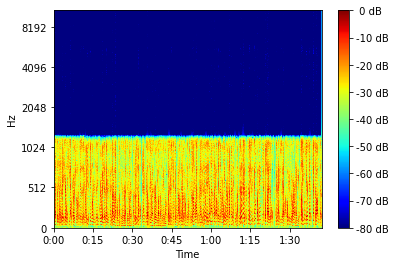

In [13]:
stft_res = librosa.stft(y, n_fft=4096, win_length=4096, hop_length=512)
D = np.abs(stft_res)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='mel', x_axis='time', cmap = cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()

<h3> Mel Spectrogram </h3>

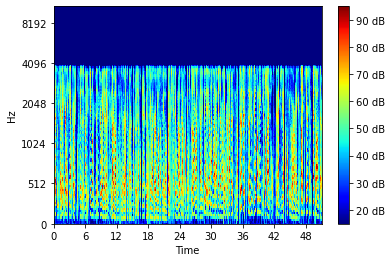

In [20]:
# stft documnets : https://librosa.org/doc/0.8.0/generated/librosa.stft.html
# mel spectrogram 자료 : https://hyongdoc.tistory.com/402
n_fft = 2048
win_length = 2048
hop_length = 1024
n_mels = 128
D = np.abs(librosa.stft(y, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
mel_spec = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)
librosa.display.specshow(librosa.amplitude_to_db(mel_spec, ref=0.0002), sr=sr, hop_length=hop_length, y_axis='mel', x_axis='time', cmap=cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()

<h3> Mel Frequency Cepstral Coeficient </h3>

In [22]:
# 참조 사이트 : https://hyongdoc.tistory.com/403

n_fft = 2048
win_length = 2048
hop_length = 1024
n_mels = 128
n_mfcc = 20

D = np.abs(librosa.stft(y, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(D), sr=sr, n_mfcc=n_mfcc)